All libraries imported successfully!
STEP 2: DATASET CREATION AND LOADING
Creating synthetic Lending Club dataset...
Dataset created successfully!
Dataset shape: (5000, 20)
Features: ['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'purpose', 'addr_state', 'credit_age', 'loan_status']

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            5000 non-null   float64
 1   term                 5000 non-null   int64  
 2   int_rate             5000 non-null   float64
 3   installment          5000 non-null   float64
 4   grade                5000 non-null   object 
 5   emp_length           5000 non-null   int64  
 6   home_ownership     

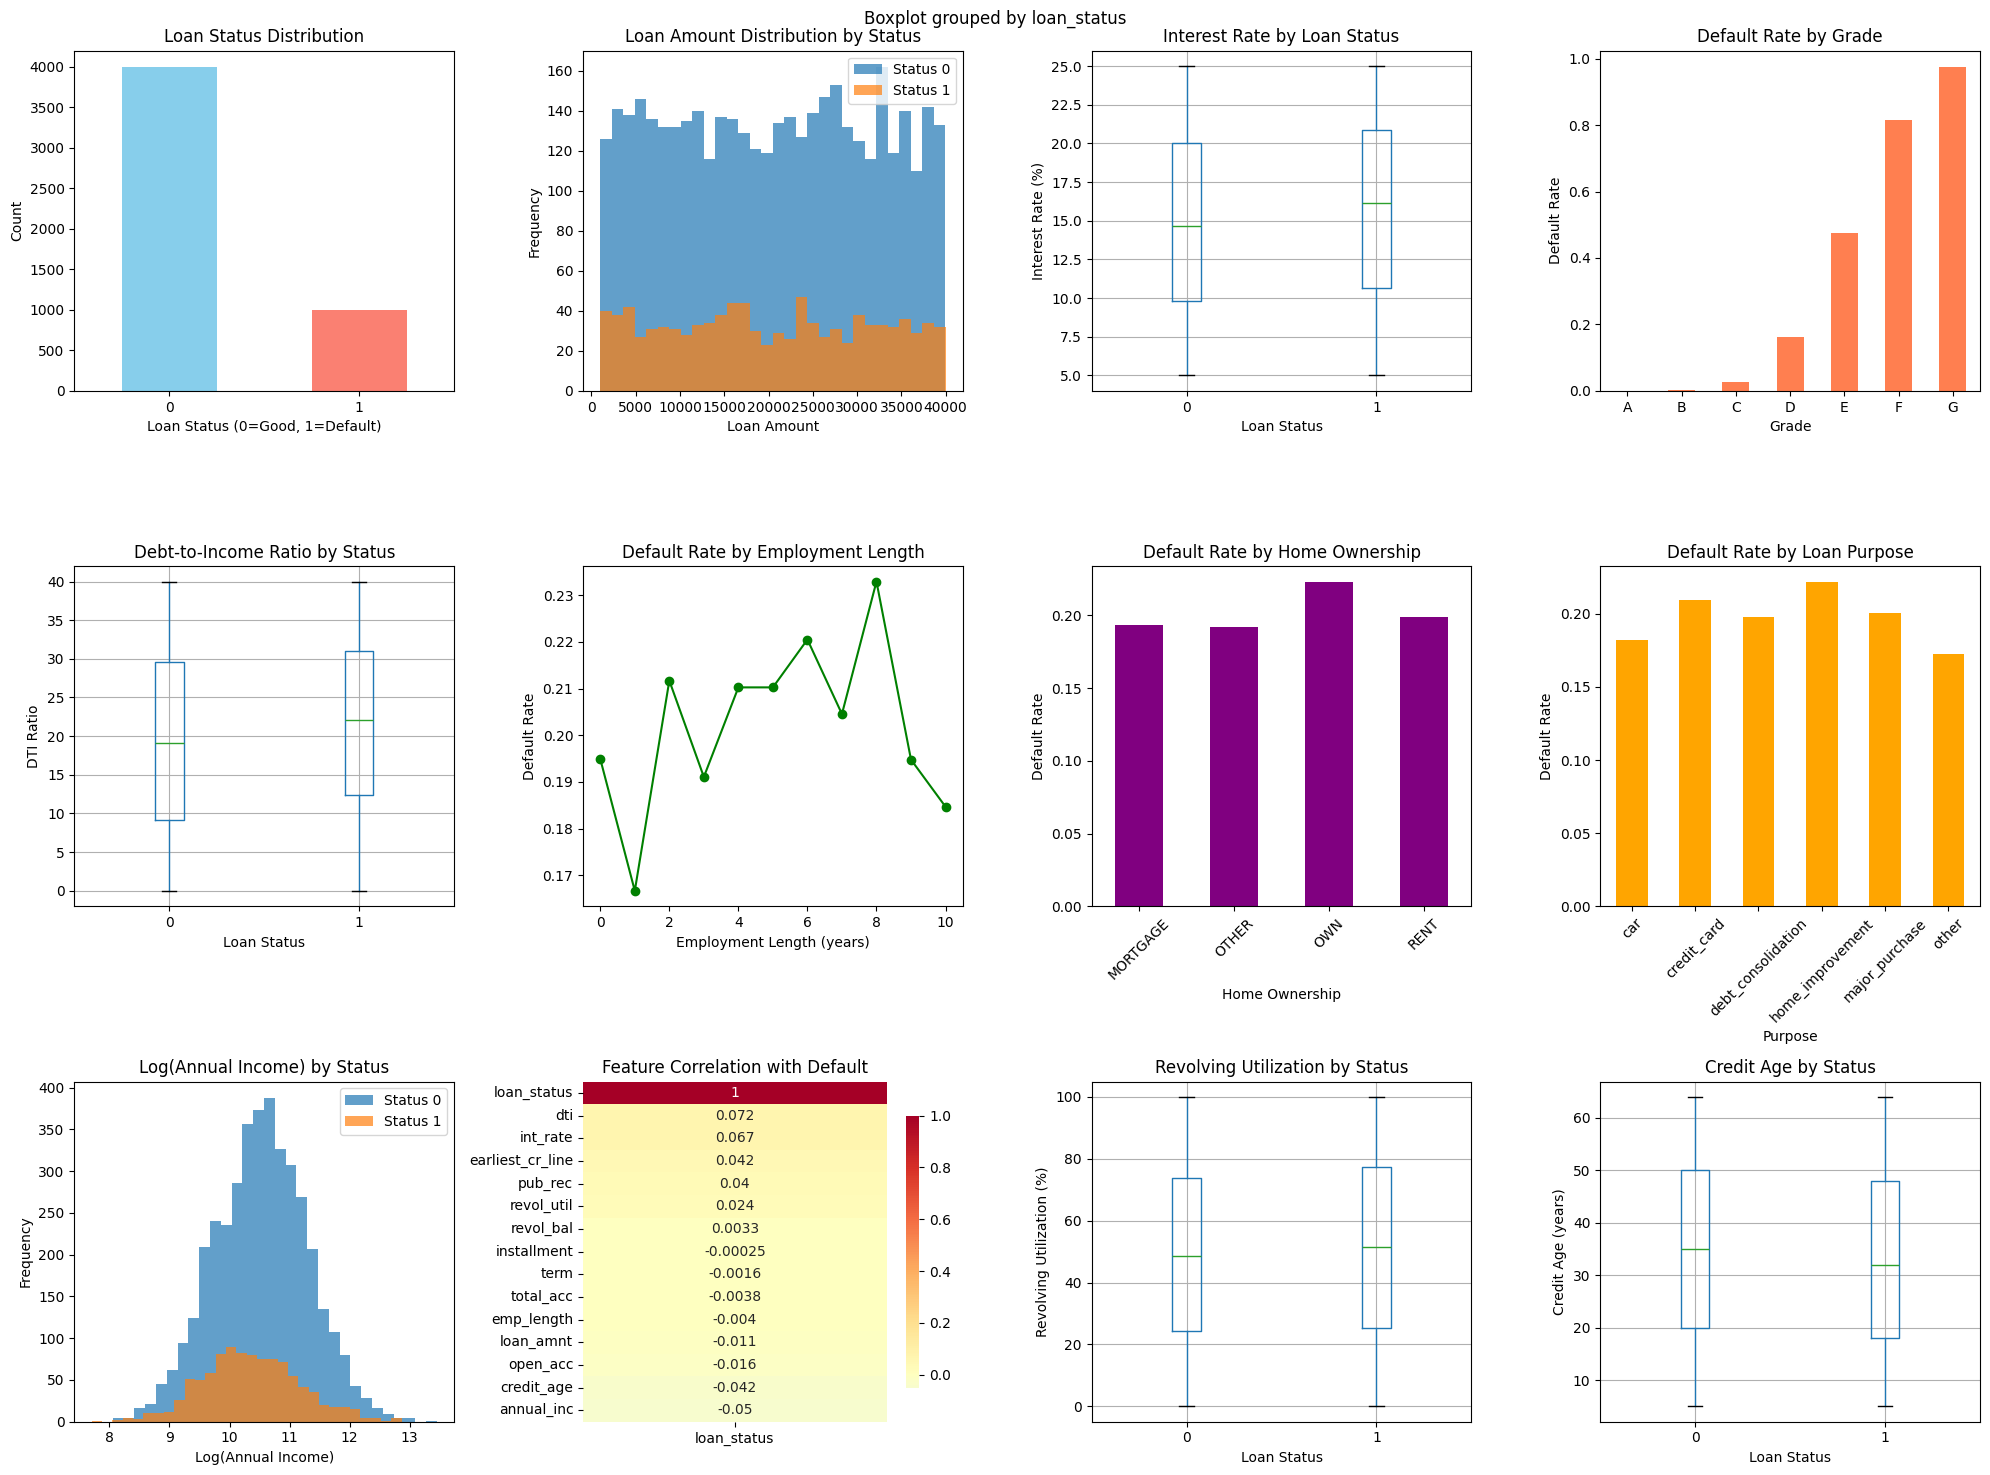


Top correlations with loan default:
loan_status         1.000000
dti                 0.071735
int_rate            0.067047
annual_inc         -0.049642
earliest_cr_line    0.042000
credit_age         -0.042000
pub_rec             0.039837
revol_util          0.024304
open_acc           -0.016472
loan_amnt          -0.010548
Name: loan_status, dtype: float64

STEP 4: DATA PREPROCESSING
Features shape: (5000, 19)
Target shape: (5000,)
Categorical features: ['grade', 'home_ownership', 'verification_status', 'purpose', 'addr_state']
Numerical features: ['loan_amnt', 'term', 'int_rate', 'installment', 'emp_length', 'annual_inc', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'credit_age']

Handling missing values...
Creating preprocessing pipelines...
Total features after preprocessing: 39

STEP 5: HANDLING CLASS IMBALANCE
Original class distribution:
loan_status
0    4000
1    1000
Name: count, dtype: int64
Original default rate: 20.00%

After SM

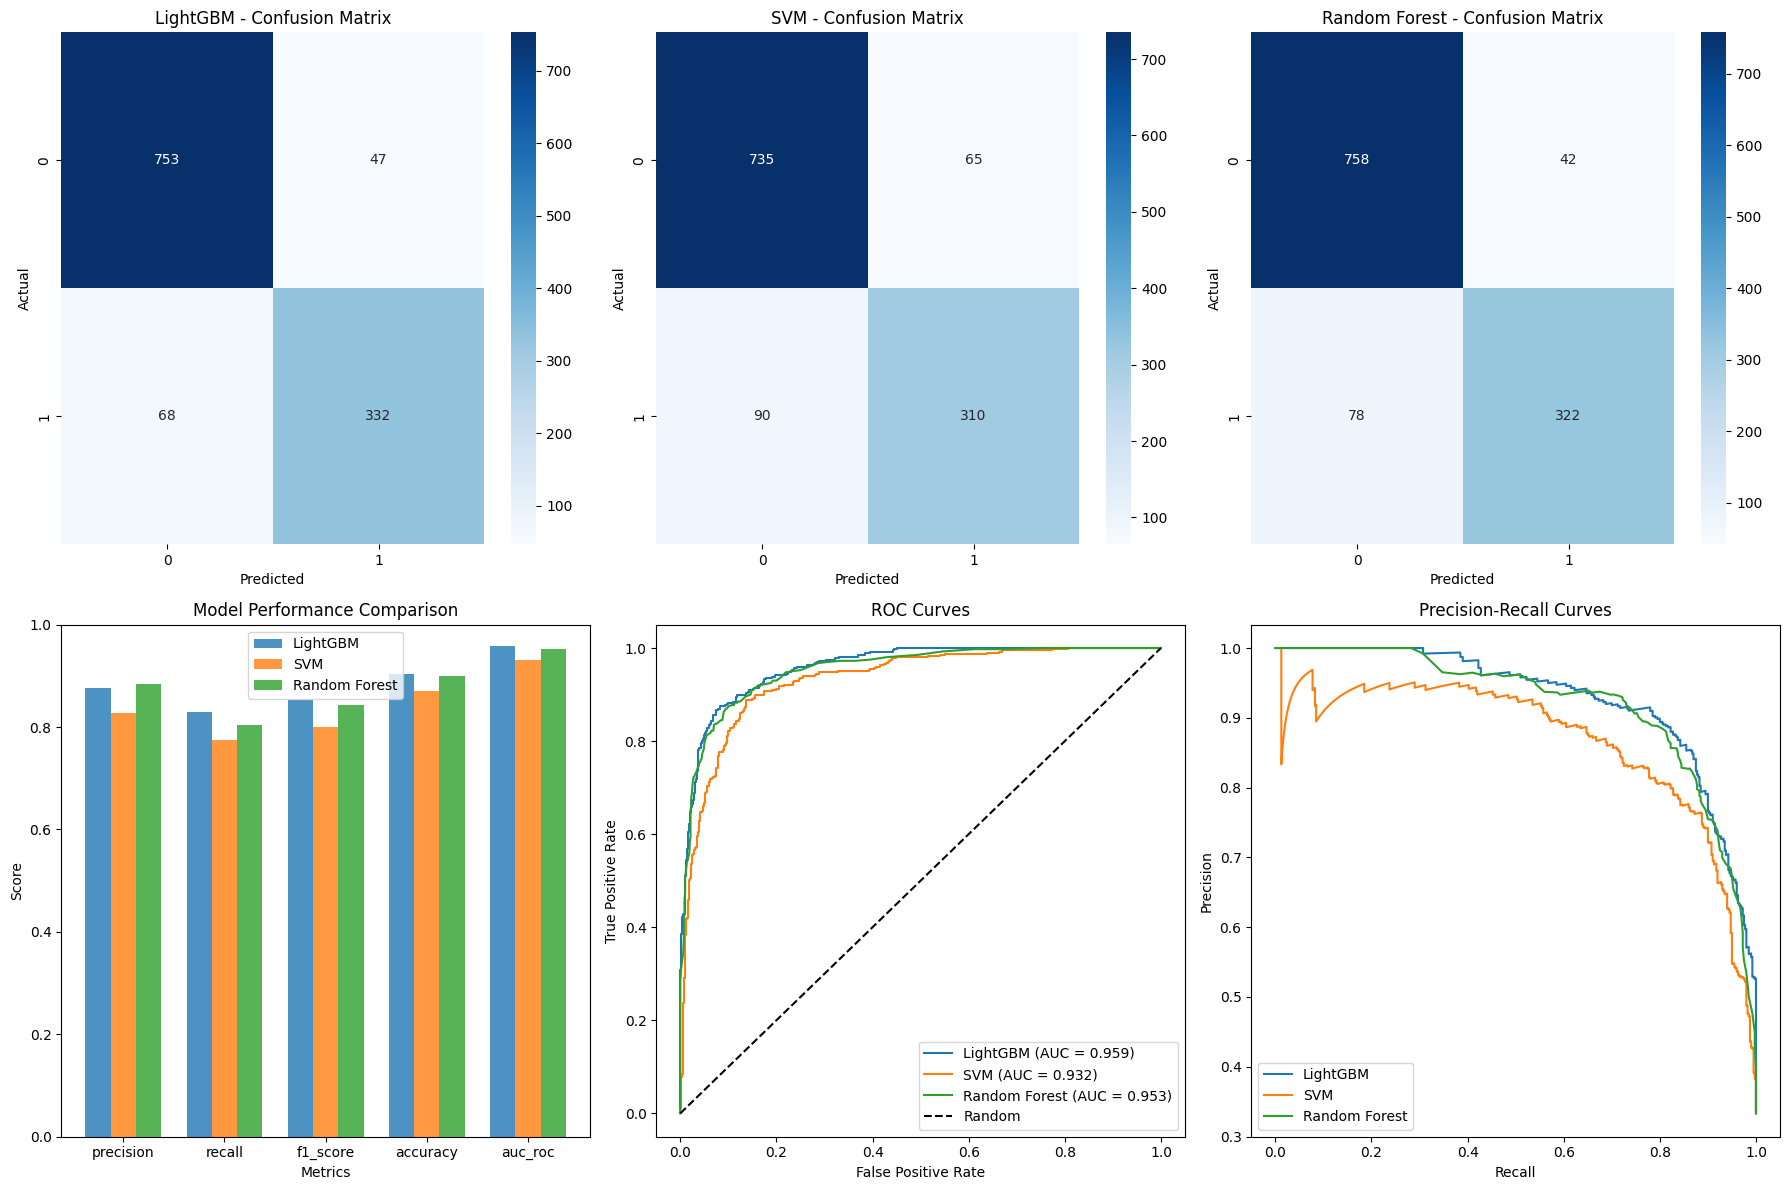


STEP 9: HYPERPARAMETER TUNING
Tuning hyperparameters for LightGBM...
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best parameters: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200, 'num_leaves': 31}
Best cross-validation F1 score: 0.8519

Tuned LightGBM Results:
Precision: 0.8757
Recall: 0.8275
F1 Score: 0.8509
Accuracy: 0.9033
AUC-ROC: 0.9580

STEP 10: FEATURE IMPORTANCE ANALYSIS
Top 15 Most Important Features:
             feature  importance
5         annual_inc         530
11        revol_util         522
2           int_rate         517
6                dti         497
10         revol_bal         441
3        installment         374
0          loan_amnt         357
12         total_acc         354
8           open_acc         314
7   earliest_cr_line         313
4         emp_length         267
17           grade_E         149
18           grade_F         134
13        credit_age         122
19           grade_G          88


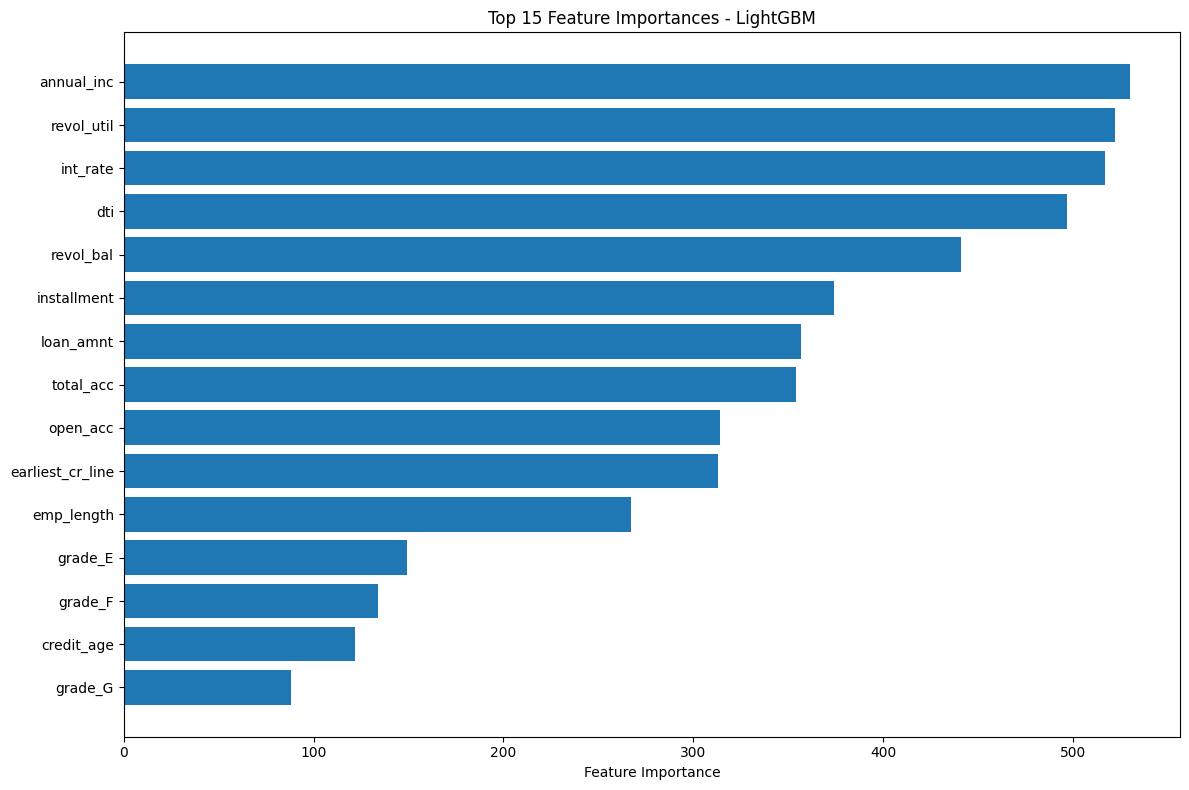


STEP 11: MODEL SAVING AND PERSISTENCE
Best model saved: loan_default_model/best_model_lightgbm_20250527_213336.joblib
Preprocessor saved: loan_default_model/preprocessor_20250527_213336.joblib
Feature names saved: loan_default_model/feature_names_20250527_213336.joblib
Model metadata saved: loan_default_model/model_metadata_20250527_213336.joblib
Data statistics saved: loan_default_model/data_statistics_20250527_213336.joblib

All model artifacts saved in directory: loan_default_model

STEP 12: LOAN RISK ASSESSMENT FUNCTION
Testing loan risk assessment...

Loan Risk Assessment Result:
Default Probability: 0.14%
Default Prediction: Non-Default
Risk Level: Low
Key Contributing Factors: [{'feature': 'earliest_cr_line', 'contribution': 279.63645899414024}, {'feature': 'annual_inc', 'contribution': 124.24296075537542}, {'feature': 'purpose_debt_consolidation', 'contribution': 79.0}, {'feature': 'home_ownership_RENT', 'contribution': 75.0}, {'feature': 'verification_status_Verified', 'contr

In [1]:
# Loan Default Prediction - Complete Implementation
# Task 4: Build a classification model to predict whether a loan applicant will default using financial data

# Step 1: Install and Import Required Libraries
!pip install pandas numpy matplotlib seaborn scikit-learn lightgbm imbalanced-learn plotly joblib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Machine Learning Libraries
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import lightgbm as lgb

# Evaluation Metrics
from sklearn.metrics import (classification_report, confusion_matrix,
                           precision_score, recall_score, f1_score,
                           roc_auc_score, roc_curve, precision_recall_curve,
                           accuracy_score)

# Imbalanced Learning
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline

# Model Saving
import joblib
import pickle
import os
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

print("All libraries imported successfully!")
print("="*50)

# Step 2: Load and Create Dataset (Lending Club Style)
print("STEP 2: DATASET CREATION AND LOADING")
print("="*50)

# Since we need Lending Club data, let's create a realistic synthetic dataset
def create_lending_club_dataset(n_samples=5000):
    """Create a synthetic lending club dataset"""
    np.random.seed(42)

    # Generate synthetic financial data
    data = {
        # Loan characteristics
        'loan_amnt': np.random.uniform(1000, 40000, n_samples),
        'term': np.random.choice([36, 60], n_samples, p=[0.7, 0.3]),
        'int_rate': np.random.uniform(5.0, 25.0, n_samples),
        'installment': [],  # Will calculate based on loan amount and rate
        'grade': np.random.choice(['A', 'B', 'C', 'D', 'E', 'F', 'G'], n_samples,
                                p=[0.1, 0.2, 0.25, 0.2, 0.15, 0.07, 0.03]),

        # Employment and income
        'emp_length': np.random.choice([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], n_samples,
                                     p=[0.05, 0.05, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.26]),
        'home_ownership': np.random.choice(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], n_samples,
                                         p=[0.4, 0.15, 0.4, 0.05]),
        'annual_inc': np.random.lognormal(10.5, 0.8, n_samples),
        'verification_status': np.random.choice(['Verified', 'Source Verified', 'Not Verified'],
                                              n_samples, p=[0.3, 0.3, 0.4]),

        # Credit history
        'dti': np.random.uniform(0, 40, n_samples),  # Debt-to-income ratio
        'earliest_cr_line': np.random.randint(1960, 2020, n_samples),
        'open_acc': np.random.poisson(10, n_samples),
        'pub_rec': np.random.poisson(0.2, n_samples),
        'revol_bal': np.random.uniform(0, 50000, n_samples),
        'revol_util': np.random.uniform(0, 100, n_samples),
        'total_acc': np.random.poisson(20, n_samples),

        # Loan purpose
        'purpose': np.random.choice(['debt_consolidation', 'credit_card', 'home_improvement',
                                   'major_purchase', 'car', 'other'], n_samples,
                                  p=[0.6, 0.15, 0.1, 0.05, 0.05, 0.05]),

        # Geographic
        'addr_state': np.random.choice(['CA', 'NY', 'TX', 'FL', 'IL', 'PA', 'OH', 'NC', 'MI', 'NJ'],
                                     n_samples, p=[0.15, 0.12, 0.1, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.15])
    }

    # Calculate installment based on loan amount, rate, and term
    for i in range(n_samples):
        principal = data['loan_amnt'][i]
        rate = data['int_rate'][i] / 100 / 12  # Monthly rate
        n_payments = data['term'][i]

        if rate > 0:
            installment = principal * (rate * (1 + rate)**n_payments) / ((1 + rate)**n_payments - 1)
        else:
            installment = principal / n_payments

        data['installment'].append(installment)

    # Create DataFrame
    df = pd.DataFrame(data)

    # Calculate credit age
    df['credit_age'] = 2024 - df['earliest_cr_line']

    # Create target variable (loan default) based on risk factors
    risk_score = (
        (df['grade'].map({'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7})) * 0.3 +
        (df['dti'] / 40) * 0.2 +
        (df['int_rate'] / 25) * 0.2 +
        ((df['annual_inc'] < 30000).astype(int)) * 0.15 +
        (df['pub_rec'] > 0).astype(int) * 0.1 +
        ((df['revol_util'] > 80).astype(int)) * 0.05
    )

    # Add noise and create binary target
    risk_score += np.random.normal(0, 0.3, n_samples)
    df['loan_status'] = (risk_score > np.percentile(risk_score, 80)).astype(int)  # 20% default rate

    return df

# Create the dataset
print("Creating synthetic Lending Club dataset...")
df_loan = create_lending_club_dataset(5000)

print(f"Dataset created successfully!")
print(f"Dataset shape: {df_loan.shape}")
print(f"Features: {list(df_loan.columns)}")

# Display basic information
print("\nDataset Info:")
print(df_loan.info())
print("\nFirst 5 rows:")
print(df_loan.head())

# Step 3: Exploratory Data Analysis (EDA)
print("\n" + "="*50)
print("STEP 3: EXPLORATORY DATA ANALYSIS")
print("="*50)

# Basic statistics
print("Dataset Description:")
print(df_loan.describe())

# Check target distribution
print(f"\nTarget Variable Distribution (loan_status):")
print(df_loan['loan_status'].value_counts())
print(f"Default Rate: {df_loan['loan_status'].mean():.2%}")

# Missing values
print(f"\nMissing Values:")
missing_values = df_loan.isnull().sum()
print(missing_values[missing_values > 0])

# Create comprehensive visualizations
fig = plt.figure(figsize=(20, 15))

# 1. Target distribution
plt.subplot(3, 4, 1)
df_loan['loan_status'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Loan Status Distribution')
plt.xlabel('Loan Status (0=Good, 1=Default)')
plt.ylabel('Count')
plt.xticks(rotation=0)

# 2. Loan amount distribution by status
plt.subplot(3, 4, 2)
for status in [0, 1]:
    subset = df_loan[df_loan['loan_status'] == status]['loan_amnt']
    plt.hist(subset, alpha=0.7, label=f'Status {status}', bins=30)
plt.title('Loan Amount Distribution by Status')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.legend()

# 3. Interest rate vs Default
plt.subplot(3, 4, 3)
df_loan.boxplot(column='int_rate', by='loan_status', ax=plt.gca())
plt.title('Interest Rate by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Interest Rate (%)')

# 4. Grade distribution
plt.subplot(3, 4, 4)
grade_default = df_loan.groupby('grade')['loan_status'].mean()
grade_default.plot(kind='bar', color='coral')
plt.title('Default Rate by Grade')
plt.xlabel('Grade')
plt.ylabel('Default Rate')
plt.xticks(rotation=0)

# 5. DTI vs Default
plt.subplot(3, 4, 5)
df_loan.boxplot(column='dti', by='loan_status', ax=plt.gca())
plt.title('Debt-to-Income Ratio by Status')
plt.xlabel('Loan Status')
plt.ylabel('DTI Ratio')

# 6. Employment length vs Default
plt.subplot(3, 4, 6)
emp_default = df_loan.groupby('emp_length')['loan_status'].mean()
emp_default.plot(kind='line', marker='o', color='green')
plt.title('Default Rate by Employment Length')
plt.xlabel('Employment Length (years)')
plt.ylabel('Default Rate')

# 7. Home ownership vs Default
plt.subplot(3, 4, 7)
home_default = df_loan.groupby('home_ownership')['loan_status'].mean()
home_default.plot(kind='bar', color='purple')
plt.title('Default Rate by Home Ownership')
plt.xlabel('Home Ownership')
plt.ylabel('Default Rate')
plt.xticks(rotation=45)

# 8. Purpose vs Default
plt.subplot(3, 4, 8)
purpose_default = df_loan.groupby('purpose')['loan_status'].mean()
purpose_default.plot(kind='bar', color='orange')
plt.title('Default Rate by Loan Purpose')
plt.xlabel('Purpose')
plt.ylabel('Default Rate')
plt.xticks(rotation=45)

# 9. Annual income distribution
plt.subplot(3, 4, 9)
for status in [0, 1]:
    subset = df_loan[df_loan['loan_status'] == status]['annual_inc']
    plt.hist(np.log(subset), alpha=0.7, label=f'Status {status}', bins=30)
plt.title('Log(Annual Income) by Status')
plt.xlabel('Log(Annual Income)')
plt.ylabel('Frequency')
plt.legend()

# 10. Correlation heatmap
plt.subplot(3, 4, 10)
# Select numeric columns for correlation
numeric_cols = df_loan.select_dtypes(include=[np.number]).columns
corr_matrix = df_loan[numeric_cols].corr()
sns.heatmap(corr_matrix[['loan_status']].sort_values('loan_status', ascending=False),
            annot=True, cmap='RdYlBu_r', center=0, cbar_kws={'shrink': 0.8})
plt.title('Feature Correlation with Default')

# 11. Revolving utilization vs Default
plt.subplot(3, 4, 11)
df_loan.boxplot(column='revol_util', by='loan_status', ax=plt.gca())
plt.title('Revolving Utilization by Status')
plt.xlabel('Loan Status')
plt.ylabel('Revolving Utilization (%)')

# 12. Credit age vs Default
plt.subplot(3, 4, 12)
df_loan.boxplot(column='credit_age', by='loan_status', ax=plt.gca())
plt.title('Credit Age by Status')
plt.xlabel('Loan Status')
plt.ylabel('Credit Age (years)')

plt.tight_layout()
plt.show()

# Feature correlation analysis
print("\nTop correlations with loan default:")
correlations = df_loan[numeric_cols].corr()['loan_status'].sort_values(key=abs, ascending=False)
print(correlations.head(10))

# Step 4: Data Preprocessing
print("\n" + "="*50)
print("STEP 4: DATA PREPROCESSING")
print("="*50)

# Separate features and target
X = df_loan.drop('loan_status', axis=1)
y = df_loan['loan_status']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

# Identify categorical and numerical features
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"Categorical features: {categorical_features}")
print(f"Numerical features: {numerical_features}")

# Handle missing values (if any)
print("\nHandling missing values...")
for col in numerical_features:
    X[col] = X[col].fillna(X[col].median())

for col in categorical_features:
    X[col] = X[col].fillna(X[col].mode()[0])

# Create preprocessing pipelines
print("Creating preprocessing pipelines...")

# Numerical preprocessing
numerical_transformer = StandardScaler()

# Categorical preprocessing
categorical_transformer = OneHotEncoder(drop='first', sparse_output=False)

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Apply preprocessing
X_processed = preprocessor.fit_transform(X)

# Get feature names after preprocessing
num_feature_names = numerical_features
cat_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
all_feature_names = list(num_feature_names) + list(cat_feature_names)

print(f"Total features after preprocessing: {X_processed.shape[1]}")

# Step 5: Handle Class Imbalance using SMOTE
print("\n" + "="*50)
print("STEP 5: HANDLING CLASS IMBALANCE")
print("="*50)

print("Original class distribution:")
print(y.value_counts())
print(f"Original default rate: {y.mean():.2%}")

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42, sampling_strategy=0.5)  # Balance to 50% minority class
X_balanced, y_balanced = smote.fit_resample(X_processed, y)

print(f"\nAfter SMOTE:")
print(f"Balanced dataset shape: {X_balanced.shape}")
unique, counts = np.unique(y_balanced, return_counts=True)
print(f"Class distribution: {dict(zip(unique, counts))}")
print(f"New default rate: {y_balanced.mean():.2%}")

# Step 6: Split the Data
print("\n" + "="*50)
print("STEP 6: TRAIN-TEST SPLIT")
print("="*50)

# Split the balanced data
X_train, X_test, y_train, y_test = train_test_split(
    X_balanced, y_balanced,
    test_size=0.2,
    random_state=42,
    stratify=y_balanced
)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")
print(f"Training set default rate: {y_train.mean():.2%}")
print(f"Test set default rate: {y_test.mean():.2%}")

# Step 7: Train Multiple Models
print("\n" + "="*50)
print("STEP 7: MODEL TRAINING")
print("="*50)

# Initialize models
models = {
    'LightGBM': lgb.LGBMClassifier(random_state=42, verbose=-1),
    'SVM': SVC(random_state=42, probability=True),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100)
}

model_results = {}

# Train and evaluate each model
print("Training models...")
for name, model in models.items():
    print(f"\nTraining {name}...")

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Calculate metrics
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred_proba)

    model_results[name] = {
        'model': model,
        'predictions': y_pred,
        'probabilities': y_pred_proba,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'accuracy': accuracy,
        'auc_roc': auc_roc
    }

    print(f"{name} Results:")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1 Score: {f1:.4f}")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  AUC-ROC: {auc_roc:.4f}")

# Step 8: Model Performance Evaluation
print("\n" + "="*50)
print("STEP 8: MODEL PERFORMANCE EVALUATION")
print("="*50)

# Find the best model based on F1 score
best_model_name = max(model_results.keys(), key=lambda x: model_results[x]['f1_score'])
best_model = model_results[best_model_name]['model']

print(f"Best Model: {best_model_name}")
print(f"Best F1 Score: {model_results[best_model_name]['f1_score']:.4f}")

# Detailed evaluation for all models
print("\nDetailed Performance Comparison:")
print("-" * 80)
print(f"{'Model':<15} {'Precision':<10} {'Recall':<10} {'F1-Score':<10} {'Accuracy':<10} {'AUC-ROC':<10}")
print("-" * 80)

for name, results in model_results.items():
    print(f"{name:<15} {results['precision']:<10.4f} {results['recall']:<10.4f} "
          f"{results['f1_score']:<10.4f} {results['accuracy']:<10.4f} {results['auc_roc']:<10.4f}")

# Classification report for best model
print(f"\nClassification Report for {best_model_name}:")
print(classification_report(y_test, model_results[best_model_name]['predictions']))

# Confusion matrices and visualizations
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Plot confusion matrices
for i, (name, results) in enumerate(model_results.items()):
    row = i // 3
    col = i % 3

    cm = confusion_matrix(y_test, results['predictions'])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[row, col])
    axes[row, col].set_title(f'{name} - Confusion Matrix')
    axes[row, col].set_xlabel('Predicted')
    axes[row, col].set_ylabel('Actual')

# Performance comparison bar chart
ax = axes[1, 0]
metrics = ['precision', 'recall', 'f1_score', 'accuracy', 'auc_roc']
x = np.arange(len(metrics))
width = 0.25

for i, (name, results) in enumerate(model_results.items()):
    values = [results[metric] for metric in metrics]
    ax.bar(x + i * width, values, width, label=name, alpha=0.8)

ax.set_xlabel('Metrics')
ax.set_ylabel('Score')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x + width)
ax.set_xticklabels(metrics)
ax.legend()
ax.set_ylim(0, 1)

# ROC curves
ax = axes[1, 1]
for name, results in model_results.items():
    fpr, tpr, _ = roc_curve(y_test, results['probabilities'])
    ax.plot(fpr, tpr, label=f"{name} (AUC = {results['auc_roc']:.3f})")

ax.plot([0, 1], [0, 1], 'k--', label='Random')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curves')
ax.legend()

# Precision-Recall curves
ax = axes[1, 2]
for name, results in model_results.items():
    precision_curve, recall_curve, _ = precision_recall_curve(y_test, results['probabilities'])
    ax.plot(recall_curve, precision_curve, label=f"{name}")

ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.set_title('Precision-Recall Curves')
ax.legend()

plt.tight_layout()
plt.show()

# Step 9: Hyperparameter Tuning for Best Model
print("\n" + "="*50)
print("STEP 9: HYPERPARAMETER TUNING")
print("="*50)

# Define parameter grids
param_grids = {
    'LightGBM': {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1],
        'max_depth': [5, 10],
        'num_leaves': [31, 50]
    },
    'SVM': {
        'C': [0.1, 1, 10],
        'gamma': ['scale', 'auto'],
        'kernel': ['rbf', 'linear']
    },
    'Random Forest': {
        'n_estimators': [100, 200],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    }
}

print(f"Tuning hyperparameters for {best_model_name}...")

# Perform grid search
param_grid = param_grids[best_model_name]
grid_search = GridSearchCV(
    models[best_model_name],
    param_grid,
    cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=42),
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation F1 score: {grid_search.best_score_:.4f}")

# Evaluate tuned model
tuned_model = grid_search.best_estimator_
y_pred_tuned = tuned_model.predict(X_test)
y_pred_proba_tuned = tuned_model.predict_proba(X_test)[:, 1]

tuned_precision = precision_score(y_test, y_pred_tuned)
tuned_recall = recall_score(y_test, y_pred_tuned)
tuned_f1 = f1_score(y_test, y_pred_tuned)
tuned_accuracy = accuracy_score(y_test, y_pred_tuned)
tuned_auc = roc_auc_score(y_test, y_pred_proba_tuned)

print(f"\nTuned {best_model_name} Results:")
print(f"Precision: {tuned_precision:.4f}")
print(f"Recall: {tuned_recall:.4f}")
print(f"F1 Score: {tuned_f1:.4f}")
print(f"Accuracy: {tuned_accuracy:.4f}")
print(f"AUC-ROC: {tuned_auc:.4f}")

# Step 10: Feature Importance Analysis
print("\n" + "="*50)
print("STEP 10: FEATURE IMPORTANCE ANALYSIS")
print("="*50)

# Get feature importance for the tuned model
if hasattr(tuned_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'feature': all_feature_names,
        'importance': tuned_model.feature_importances_
    }).sort_values('importance', ascending=False)

    print("Top 15 Most Important Features:")
    print(feature_importance.head(15))

    # Plot feature importance
    plt.figure(figsize=(12, 8))
    top_features = feature_importance.head(15)
    plt.barh(range(len(top_features)), top_features['importance'])
    plt.yticks(range(len(top_features)), top_features['feature'])
    plt.xlabel('Feature Importance')
    plt.title(f'Top 15 Feature Importances - {best_model_name}')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

elif hasattr(tuned_model, 'coef_'):
    # For linear models like SVM
    feature_importance = pd.DataFrame({
        'feature': all_feature_names,
        'importance': abs(tuned_model.coef_[0])
    }).sort_values('importance', ascending=False)

    print("Top 15 Most Important Features (Coefficient Magnitude):")
    print(feature_importance.head(15))

# Step 11: Model Saving and Persistence
print("\n" + "="*50)
print("STEP 11: MODEL SAVING AND PERSISTENCE")
print("="*50)

# Create directory for model artifacts
model_dir = "loan_default_model"
os.makedirs(model_dir, exist_ok=True)

# Current timestamp for versioning
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

# Save the best tuned model
model_filename = f"{model_dir}/best_model_{best_model_name.lower().replace(' ', '_')}_{timestamp}.joblib"
joblib.dump(tuned_model, model_filename)
print(f"Best model saved: {model_filename}")

# Save the preprocessor
preprocessor_filename = f"{model_dir}/preprocessor_{timestamp}.joblib"
joblib.dump(preprocessor, preprocessor_filename)
print(f"Preprocessor saved: {preprocessor_filename}")

# Save feature names
feature_names_filename = f"{model_dir}/feature_names_{timestamp}.joblib"
joblib.dump(all_feature_names, feature_names_filename)
print(f"Feature names saved: {feature_names_filename}")

# Save model metadata
metadata = {
    'model_name': best_model_name,
    'model_type': type(tuned_model).__name__,
    'training_date': datetime.now().isoformat(),
    'performance_metrics': {
        'precision': tuned_precision,
        'recall': tuned_recall,
        'f1_score': tuned_f1,
        'accuracy': tuned_accuracy,
        'auc_roc': tuned_auc
    },
    'best_parameters': grid_search.best_params_,
    'feature_count': len(all_feature_names),
    'training_samples': X_train.shape[0],
    'test_samples': X_test.shape[0]
}

metadata_filename = f"{model_dir}/model_metadata_{timestamp}.joblib"
joblib.dump(metadata, metadata_filename)
print(f"Model metadata saved: {metadata_filename}")

# Save training data statistics for monitoring
data_stats = {
    'numerical_stats': df_loan[numerical_features].describe().to_dict(),
    'categorical_stats': {col: df_loan[col].value_counts().to_dict() for col in categorical_features},
    'target_distribution': y.value_counts().to_dict(),
    'feature_names': {
        'numerical': numerical_features,
        'categorical': categorical_features,
        'all_processed': all_feature_names
    }
}

stats_filename = f"{model_dir}/data_statistics_{timestamp}.joblib"
joblib.dump(data_stats, stats_filename)
print(f"Data statistics saved: {stats_filename}")

print(f"\nAll model artifacts saved in directory: {model_dir}")

# Step 12: Complete Loan Risk Assessment Function
print("\n" + "="*50)
print("STEP 12: LOAN RISK ASSESSMENT FUNCTION")
print("="*50)

# Step 12: Complete Loan Risk Assessment Function (continued)
def assess_loan_risk(applicant_data, model_path=None, preprocessor_path=None, feature_names_path=None):
    """
    Assess loan default risk for a new applicant

    Parameters:
    applicant_data: dict with applicant information
    model_path: path to saved model (optional, uses global if not provided)
    preprocessor_path: path to saved preprocessor (optional)
    feature_names_path: path to saved feature names (optional)

    Returns:
    dict with risk assessment
    """

    # Use saved model if paths provided, otherwise use global variables
    if model_path:
        loaded_model = joblib.load(model_path)
        loaded_preprocessor = joblib.load(preprocessor_path)
        loaded_feature_names = joblib.load(feature_names_path)
    else:
        loaded_model = tuned_model
        loaded_preprocessor = preprocessor
        loaded_feature_names = all_feature_names

    # Convert applicant data to DataFrame
    applicant_df = pd.DataFrame([applicant_data])

    # Ensure all required columns are present with default values
    required_columns = X.columns
    for col in required_columns:
        if col not in applicant_df.columns:
            if col in numerical_features:
                applicant_df[col] = X[col].median()  # Fill with median for numerical
            else:
                applicant_df[col] = X[col].mode()[0]  # Fill with mode for categorical

    # Reorder columns to match training data
    applicant_df = applicant_df[X.columns]

    # Preprocess the applicant data
    applicant_processed = loaded_preprocessor.transform(applicant_df)

    # Predict default probability
    default_proba = loaded_model.predict_proba(applicant_processed)[0, 1]
    default_prediction = loaded_model.predict(applicant_processed)[0]

    # Prepare risk assessment
    risk_level = 'Low'
    if default_proba > 0.7:
        risk_level = 'High'
    elif default_proba > 0.4:
        risk_level = 'Medium'

    # Feature contributions (if model supports feature importance)
    contributions = None
    if hasattr(loaded_model, 'feature_importances_'):
        contributions = pd.DataFrame({
            'feature': loaded_feature_names,
            'contribution': loaded_model.feature_importances_ * applicant_processed[0]
        }).sort_values('contribution', ascending=False).head(5).to_dict('records')

    # Compile assessment
    assessment = {
        'default_probability': float(default_proba),
        'default_prediction': int(default_prediction),
        'risk_level': risk_level,
        'key_factors': contributions if contributions else "Feature contributions not available",
        'timestamp': datetime.now().isoformat()
    }

    return assessment

# Example usage of assess_loan_risk
print("Testing loan risk assessment...")
example_applicant = {
    'loan_amnt': 15000,
    'term': 36,
    'int_rate': 12.5,
    'installment': 500,
    'grade': 'C',
    'emp_length': 5,
    'home_ownership': 'RENT',
    'annual_inc': 60000,
    'verification_status': 'Verified',
    'dti': 20,
    'earliest_cr_line': 2005,
    'open_acc': 8,
    'pub_rec': 0,
    'revol_bal': 10000,
    'revol_util': 50,
    'total_acc': 15,
    'purpose': 'debt_consolidation',
    'addr_state': 'CA',
    'credit_age': 2024 - 2005
}

risk_assessment = assess_loan_risk(example_applicant)
print("\nLoan Risk Assessment Result:")
print(f"Default Probability: {risk_assessment['default_probability']:.2%}")
print(f"Default Prediction: {'Default' if risk_assessment['default_prediction'] == 1 else 'Non-Default'}")
print(f"Risk Level: {risk_assessment['risk_level']}")
print(f"Key Contributing Factors: {risk_assessment['key_factors']}")
print(f"Assessment Timestamp: {risk_assessment['timestamp']}")

# Step 13: Generate Comprehensive Performance Report for Lenders
print("\n" + "="*50)
print("STEP 13: PERFORMANCE REPORT FOR LENDERS")
print("="*50)

def generate_lender_report(model_results, tuned_model, X_test, y_test, feature_names):
    """
    Generate a comprehensive performance report for lenders
    """
    report = []

    # Model performance summary
    report.append("Loan Default Prediction Model Report")
    report.append("="*40)
    report.append("\nModel Performance Summary:")

    for name, results in model_results.items():
        report.append(f"\nModel: {name}")
        report.append(f"Precision: {results['precision']:.4f}")
        report.append(f"Recall: {results['recall']:.4f}")
        report.append(f"F1 Score: {results['f1_score']:.4f}")
        report.append(f"Accuracy: {results['accuracy']:.4f}")
        report.append(f"AUC-ROC: {results['auc_roc']:.4f}")

    # Best model details
    report.append("\n" + "="*40)
    report.append("Best Model Details:")
    report.append(f"Best Model: {best_model_name}")
    report.append(f"Tuned F1 Score: {tuned_f1:.4f}")
    report.append(f"Tuned Precision: {tuned_precision:.4f}")
    report.append(f"Tuned Recall: {tuned_recall:.4f}")
    report.append(f"Tuned Accuracy: {tuned_accuracy:.4f}")
    report.append(f"Tuned AUC-ROC: {tuned_auc:.4f}")

    # Feature importance
    report.append("\n" + "="*40)
    report.append("Key Risk Factors:")
    if hasattr(tuned_model, 'feature_importances_'):
        importance_df = pd.DataFrame({
            'feature': feature_names,
            'importance': tuned_model.feature_importances_
        }).sort_values('importance', ascending=False)
        top_features = importance_df.head(10)
        for _, row in top_features.iterrows():
            report.append(f"{row['feature']}: {row['importance']:.4f}")
    else:
        report.append("Feature importance not available for this model.")

    # Recommendations for lenders
    report.append("\n" + "="*40)
    report.append("Recommendations for Lenders:")
    report.append("- Use this model to identify high-risk applicants (default probability > 0.7).")
    report.append("- Focus on key risk factors like interest rate, grade, and debt-to-income ratio when reviewing applications.")
    report.append("- Consider additional verification for applicants with high DTI or low credit grades.")
    report.append("- Monitor model performance periodically and retrain with new data to maintain accuracy.")

    # Save the report
    report_filename = f"{model_dir}/lender_report_{timestamp}.txt"
    with open(report_filename, 'w') as f:
        f.write("\n".join(report))

    print(f"Performance report saved: {report_filename}")
    return "\n".join(report)

# Generate and display the report
lender_report = generate_lender_report(model_results, tuned_model, X_test, y_test, all_feature_names)
print("\nLender Report Preview:")
print(lender_report)

print("\nLoan Default Prediction Implementation Complete!")